<a href="https://colab.research.google.com/github/shibinshibu01/powervortex-lstm/blob/main/power_vortex_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from matplotlib import pyplot
from matplotlib import style
from google.colab import drive

# **Data**
---
Import from https://www.kaggle.com/datasets/imtkaggleteam/household-power-consumption/data

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
URL = '/content/gdrive/My Drive/Power Vortex/pv-lstm/household_power_consumption.txt'
df = pd.read_csv(URL, sep=';', header=0, low_memory=False, na_values='?', parse_dates={'datetime':[0, 1]}, dayfirst=True)
for col in df.columns:
    if col != 'datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')


# **Data Exploration**
---
Filled Missing Values

In [ ]:
print("First 5 rows.","\n")
df.head()

First 5 rows. 



,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
values = df.values
df['Sub_metering_4'] = (values[:,1] * 1000 / 60) - (values[:,5] + values[:,6] + values[:,7])
df['Sub_metering_4'] = df['Sub_metering_4'].astype('float64')
df.to_csv('household_power_consumption.csv')

In [ ]:
print("First 5 rows.","\n")
df.head()

First 5 rows. 



,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
print("Last 5 rows.","\n")
df.tail()

Last 5 rows. 



,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
2075254,2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,15.766667
2075255,2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0,15.733333
2075256,2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0,15.566667
2075258,2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0,15.533333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   Sub_metering_4         float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 142.5 MB


In [ ]:
print("Descriptive statistics", "\n")
print(df.describe(), "\n")

Descriptive statistics 

                            datetime  Global_active_power  \
count                        2075259         2.075259e+06   
mean   2008-12-06 07:12:59.999994112         1.086168e+00   
min              2006-12-16 17:24:00         7.600000e-02   
25%              2007-12-12 00:18:30         3.080000e-01   
50%              2008-12-06 07:13:00         5.980000e-01   
75%              2009-12-01 14:07:30         1.524000e+00   
max              2010-11-26 21:02:00         1.112200e+01   
std                              NaN         1.053172e+00   

       Global_reactive_power       Voltage  Global_intensity  Sub_metering_1  \
count           2.075259e+06  2.075259e+06      2.075259e+06    2.075259e+06   
mean            1.233280e-01  2.408416e+02      4.604226e+00    1.110995e+00   
min             0.000000e+00  2.232000e+02      2.000000e-01    0.000000e+00   
25%             4.800000e-02  2.390000e+02      1.400000e+00    0.000000e+00   
50%             1.000000e

# **Feature Extraction and Engineering**
---

In [ ]:
data_set = pd.read_csv('/content/household_power_consumption.csv')

In [ ]:
del data_set["Global_reactive_power"]
del data_set["Voltage"]
del data_set["Global_intensity"]
del data_set["Sub_metering_1"]
del data_set["Sub_metering_2"]
del data_set["Sub_metering_3"]
del data_set["Sub_metering_4"]
data_set.rename(columns={"datetime":"DateTime","Global_active_power":"Consumption"},inplace=True)

In [ ]:
data_set = data_set.drop(columns=['Unnamed: 0'])
print(data_set.head(5))

              DateTime  Consumption
0  2006-12-16 17:24:00        4.216
1  2006-12-16 17:25:00        5.360
2  2006-12-16 17:26:00        5.374
3  2006-12-16 17:27:00        5.388
4  2006-12-16 17:28:00        3.666


In [ ]:
dataset = data_set
dataset["Month"] = pd.to_datetime(data_set["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(data_set["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(data_set["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(data_set["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(data_set["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(data_set["DateTime"]).dt.day_name()
dataset = data_set.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [ ]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,12,2006,2006-12-16,17:24:00,50,Saturday
2006-12-16 17:25:00,5.360,12,2006,2006-12-16,17:25:00,50,Saturday
2006-12-16 17:26:00,5.374,12,2006,2006-12-16,17:26:00,50,Saturday
2006-12-16 17:27:00,5.388,12,2006,2006-12-16,17:27:00,50,Saturday
2006-12-16 17:28:00,3.666,12,2006,2006-12-16,17:28:00,50,Saturday


In [ ]:
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2010-11-26 20:58:00,0.946,11,2010,2010-11-26,20:58:00,47,Friday
2010-11-26 20:59:00,0.944,11,2010,2010-11-26,20:59:00,47,Friday
2010-11-26 21:00:00,0.938,11,2010,2010-11-26,21:00:00,47,Friday
2010-11-26 21:01:00,0.934,11,2010,2010-11-26,21:01:00,47,Friday
2010-11-26 21:02:00,0.932,11,2010,2010-11-26,21:02:00,47,Friday


In [ ]:
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())

Total Number of Years:  5
[2006 2007 2008 2009 2010]


In [ ]:
#Assuming week starts on Mondey and ends on Sunday.
#Monday 18-12-2006 to Sunday 26-12-2021
#Omit first 1837 and last 7021 rows
dataset = dataset[1836:-7023]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2010-11-21 23:55:00,0.316,11,2010,2010-11-21,23:55:00,46,Sunday
2010-11-21 23:56:00,0.316,11,2010,2010-11-21,23:56:00,46,Sunday
2010-11-21 23:57:00,0.316,11,2010,2010-11-21,23:57:00,46,Sunday
2010-11-21 23:58:00,0.316,11,2010,2010-11-21,23:58:00,46,Sunday
2010-11-21 23:59:00,0.314,11,2010,2010-11-21,23:59:00,46,Sunday


In [ ]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2006-12-18 00:00:00,0.278,12,2006,2006-12-18,00:00:00,51,Monday
2006-12-18 00:01:00,0.238,12,2006,2006-12-18,00:01:00,51,Monday
2006-12-18 00:02:00,0.208,12,2006,2006-12-18,00:02:00,51,Monday
2006-12-18 00:03:00,0.206,12,2006,2006-12-18,00:03:00,51,Monday
2006-12-18 00:04:00,0.206,12,2006,2006-12-18,00:04:00,51,Monday


# **Data Visualization**
---

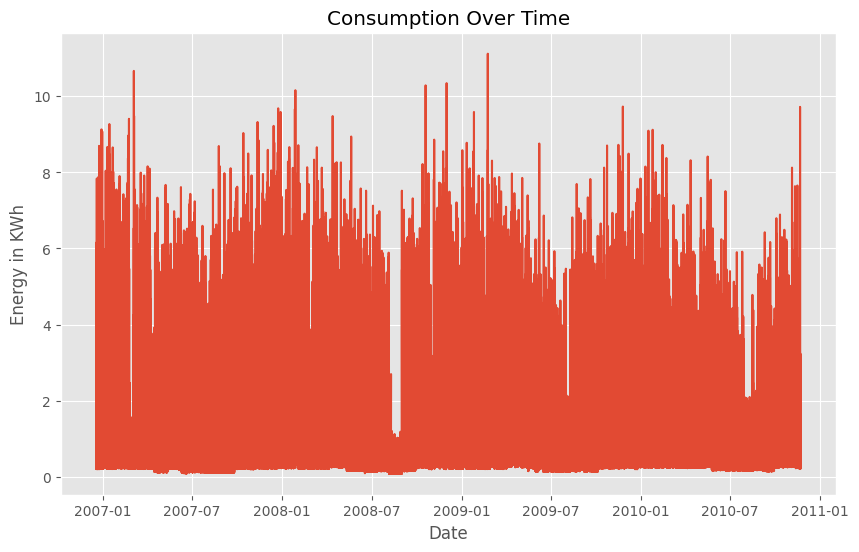

In [ ]:
style.use("ggplot")
plt.figure(figsize=(10, 6))
sns.lineplot(x='DateTime', y='Consumption', data=dataset)

plt.title('Consumption Over Time')
plt.xlabel("Date")
plt.ylabel("Energy in KWh")
plt.show()

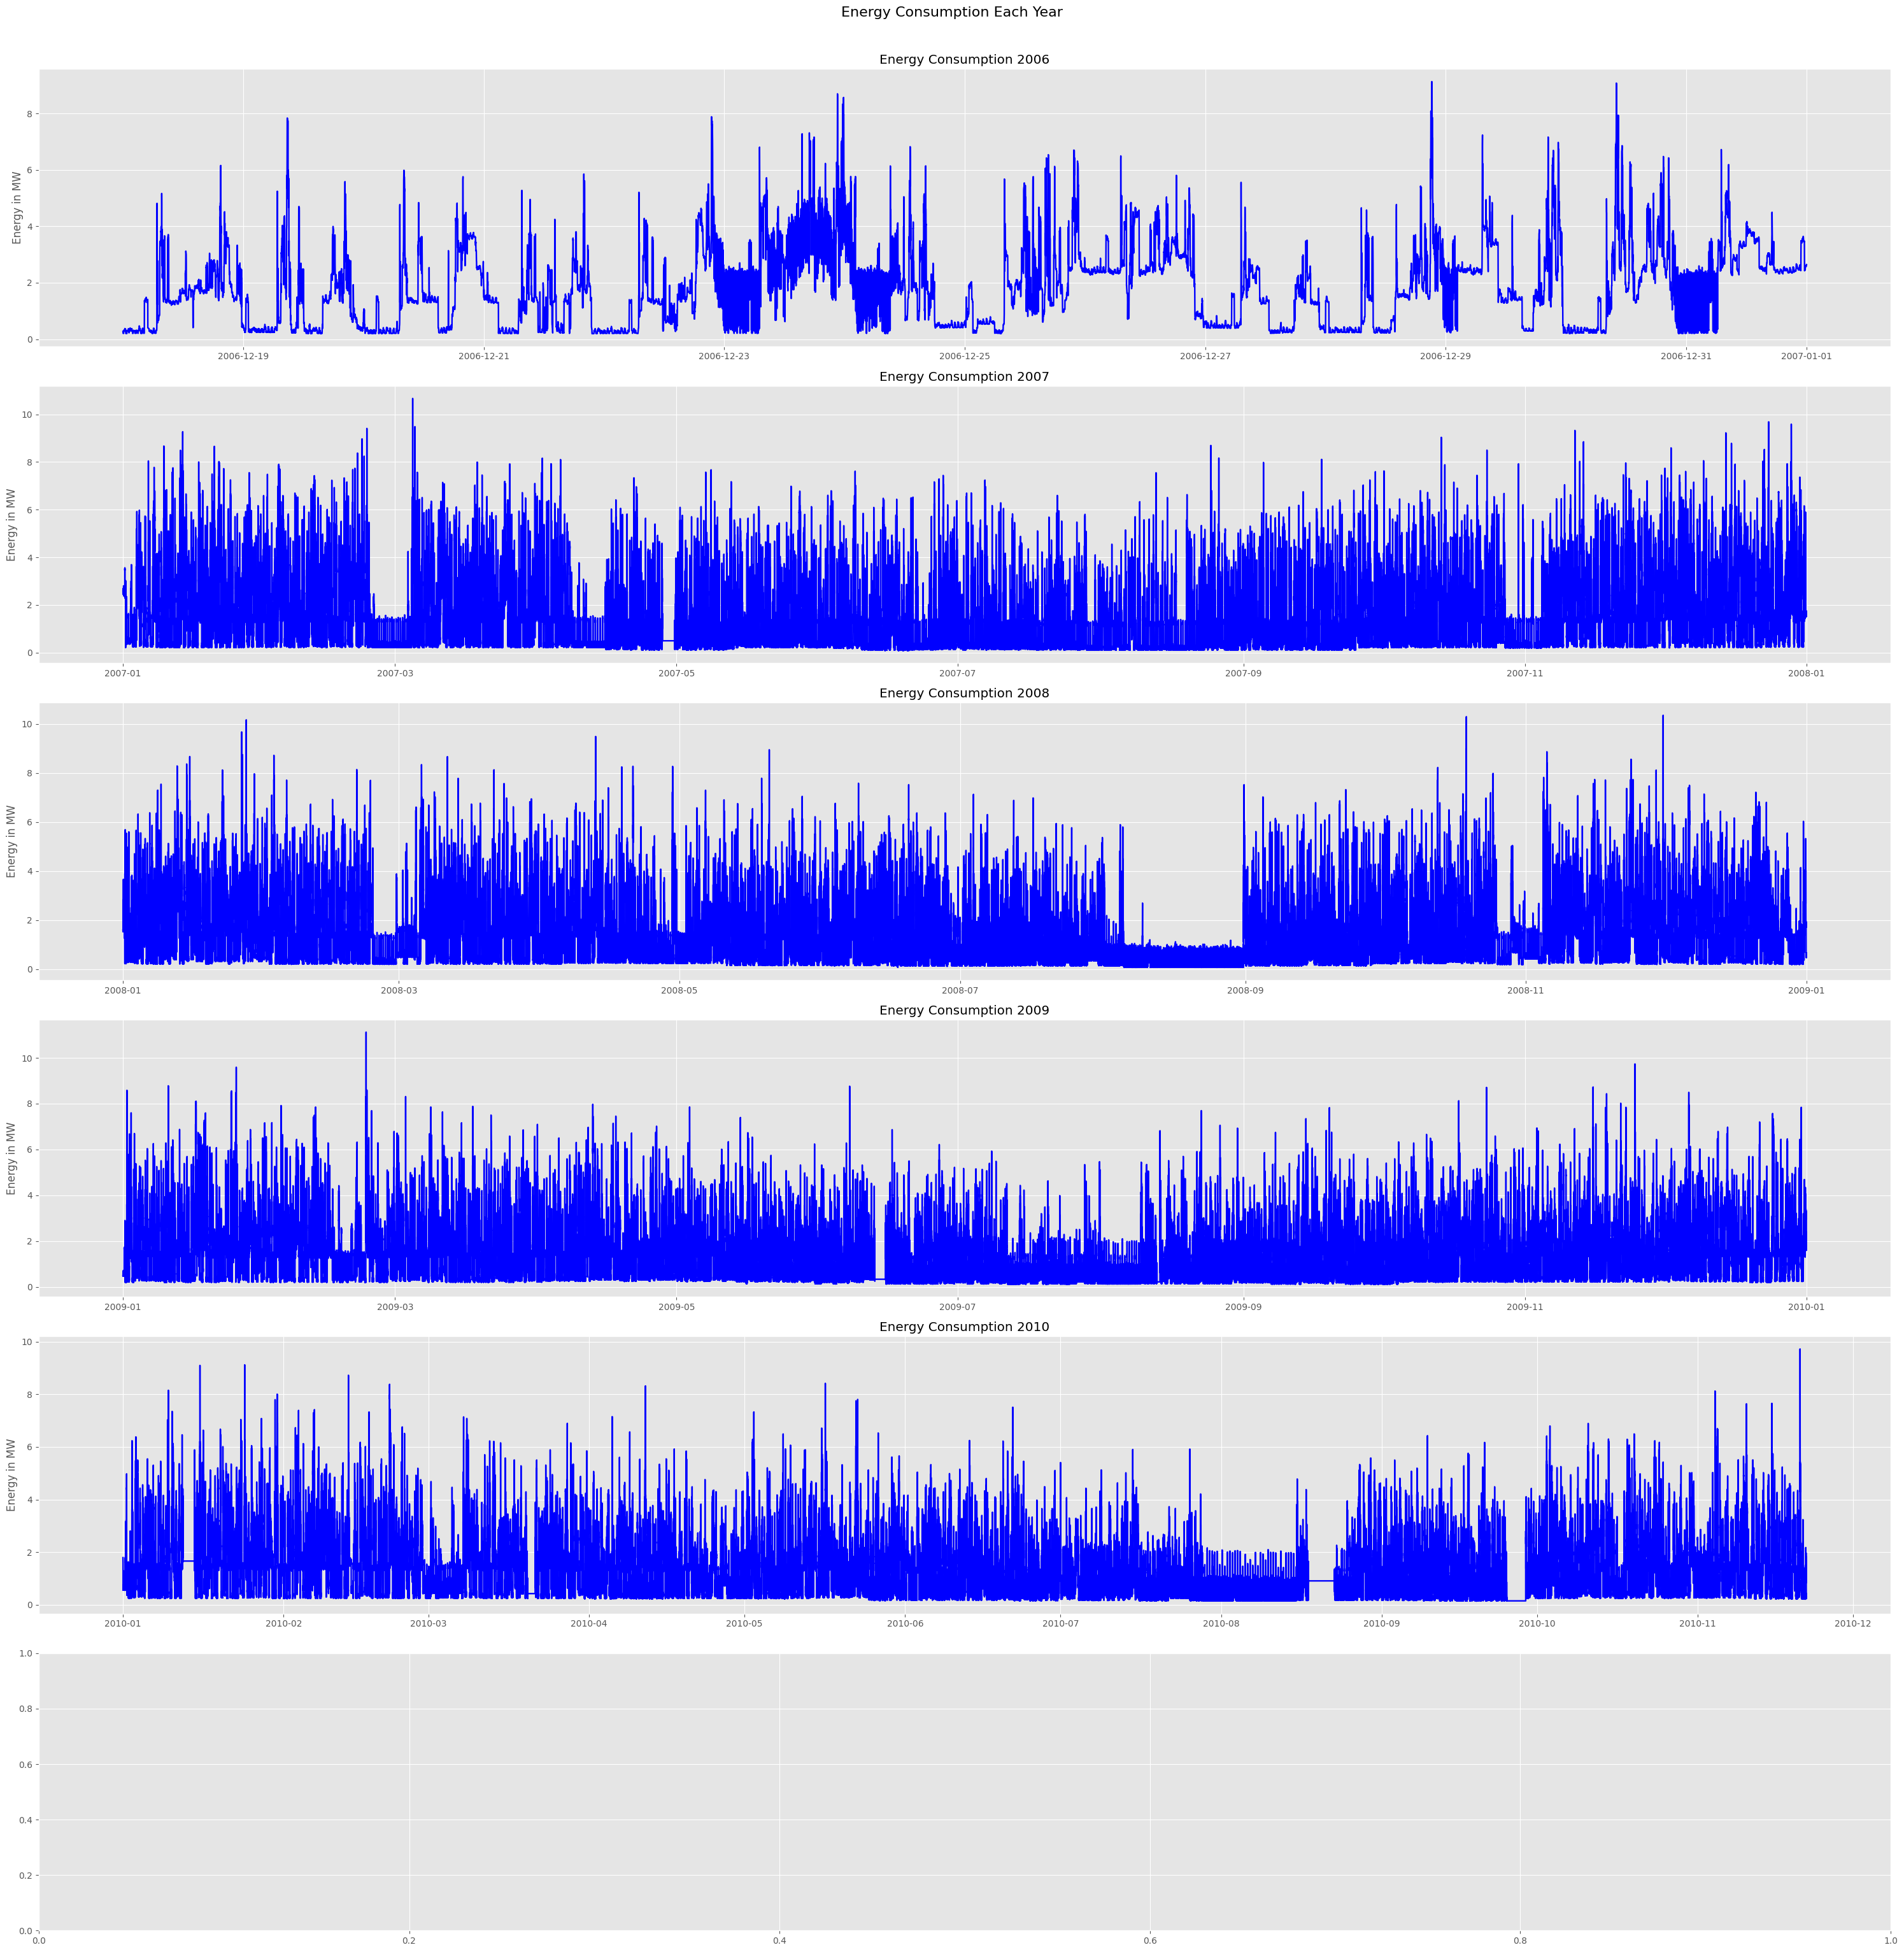

In [ ]:
style.use("ggplot")
fig, axes = plt.subplots(6, 1, figsize=(30, 30))
for i, year in enumerate(range(2006, 2011)):
    yearly_data = dataset[dataset['Year'] == year]
    axes[i].plot(yearly_data.index, yearly_data['Consumption'], color="blue", linewidth=1.7)
    axes[i].set_title(f'Energy Consumption {year}')
    if i == 5:
        axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Energy in MW")
plt.tight_layout()
fig.suptitle('Energy Consumption Each Year', fontsize=16, y=1.02)
plt.show()

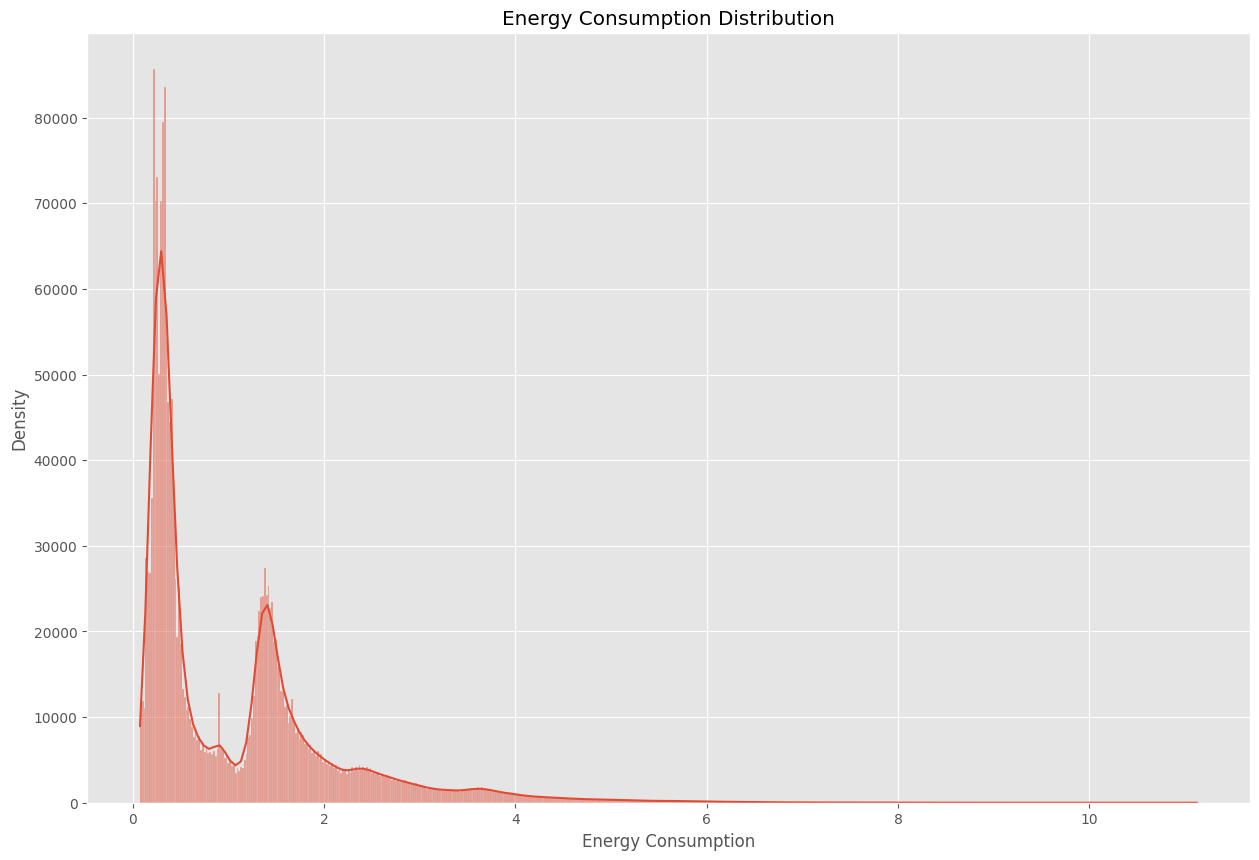

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.histplot(dataset["Consumption"], kde=True)
plt.title("Energy Consumption Distribution")
plt.xlabel("Energy Consumption")
plt.ylabel("Density")
plt.show()

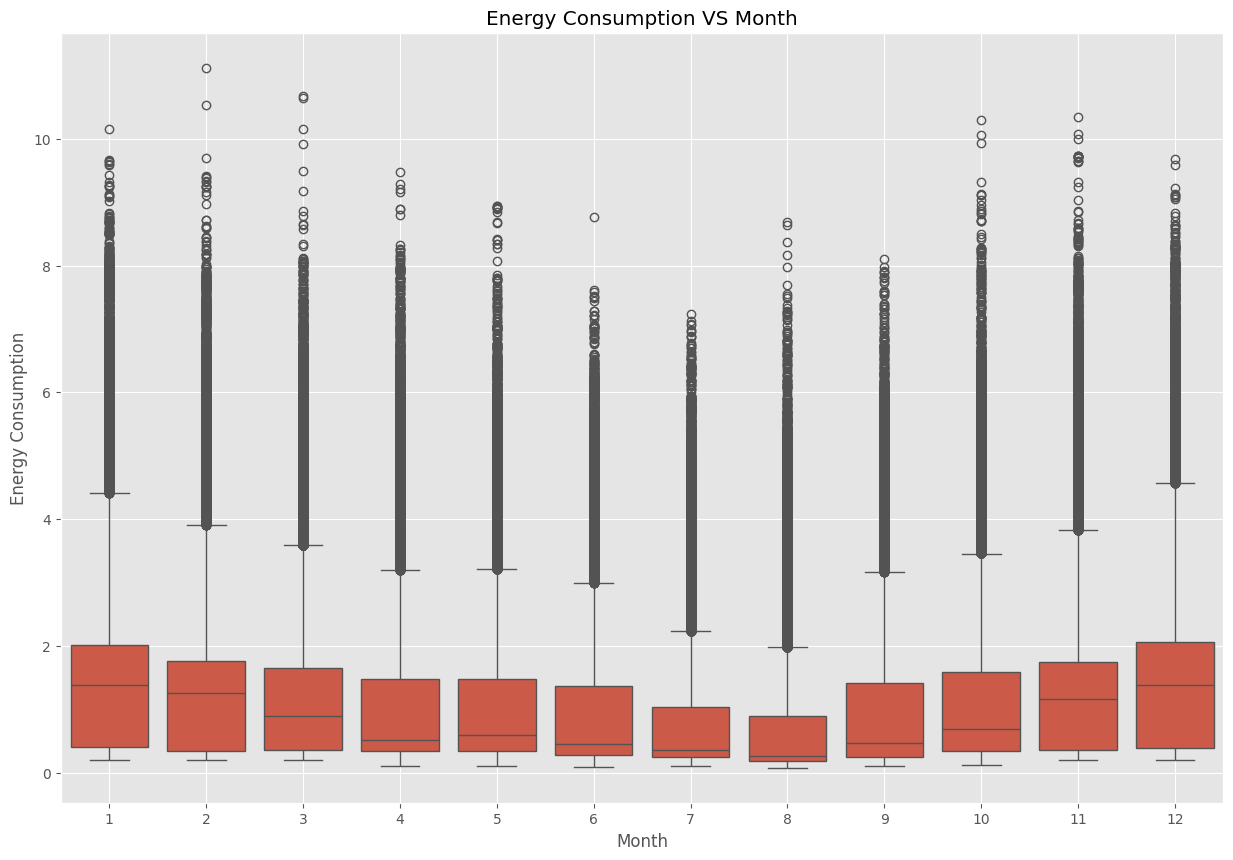

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = sns.boxplot(x="Month", y="Consumption", data=dataset)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.ylabel("Energy Consumption")
plt.grid(True, alpha=1)
plt.show()

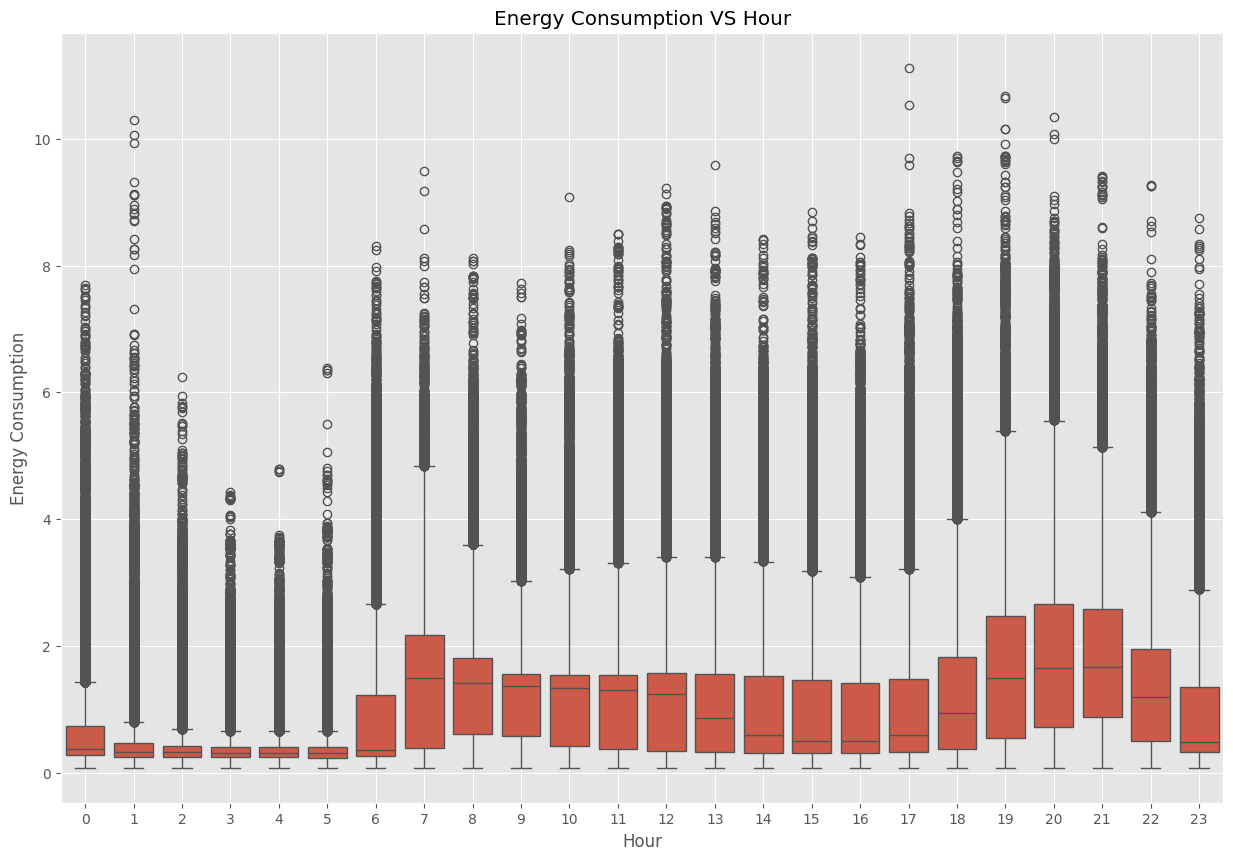

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = sns.boxplot(x=dataset.index.hour, y=dataset['Consumption'])
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.ylabel("Energy Consumption")
plt.grid(True, alpha=1)
plt.show()

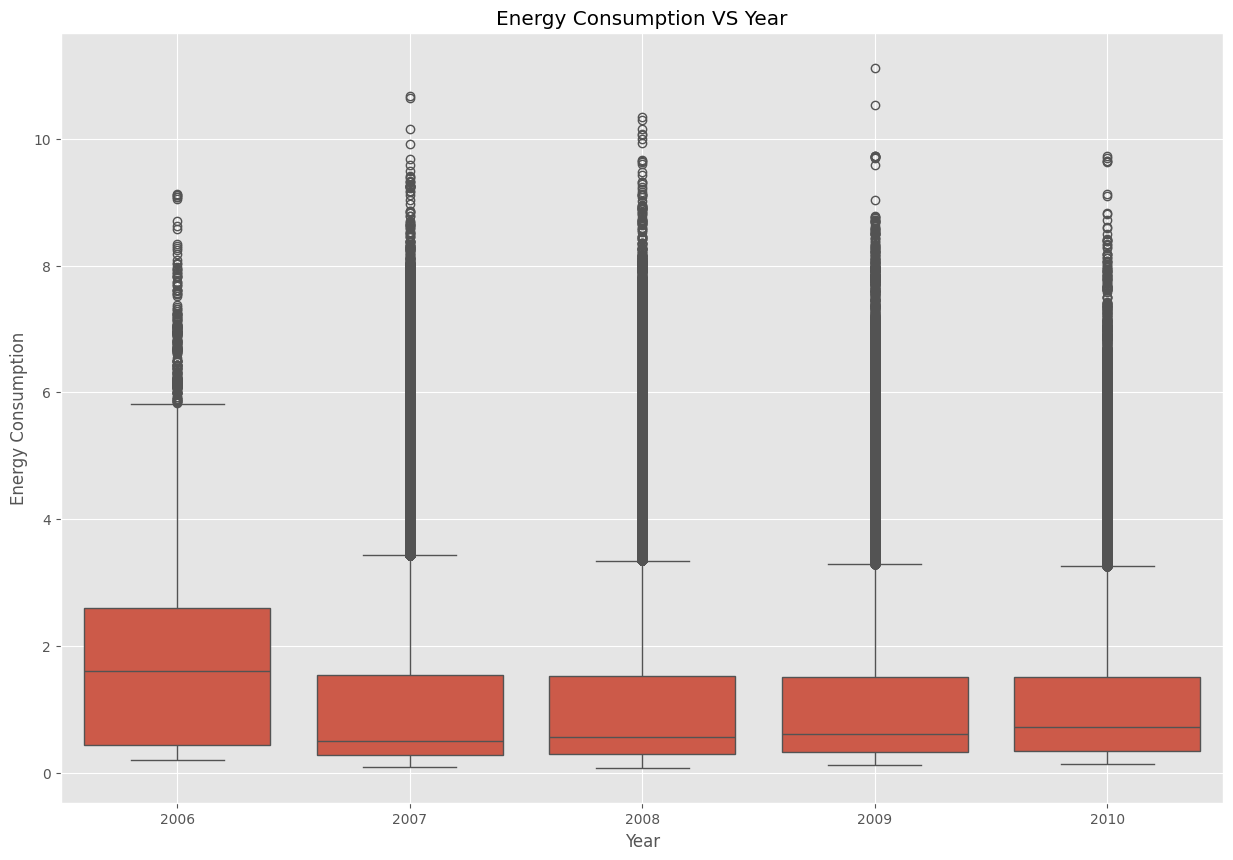

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = sns.boxplot(x=dataset.index.year, y=dataset['Consumption'])
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.grid(True, alpha=1)
plt.show()

# **LSTM MODEL**
---

##**Dataset Spliting**

In [ ]:
newDataSet = dataset[['Consumption']].resample("D").mean()
newDataSet['Month'] = newDataSet.index.month
newDataSet['Year'] = newDataSet.index.year
newDataSet['Week'] = newDataSet.index.isocalendar().week
newDataSet['Week'] = newDataSet['Week'].astype('float64')
newDataSet['Month'] = newDataSet['Month'].astype('float64')
newDataSet['Year'] = newDataSet['Year'].astype('float64')

In [ ]:
print("df(First): ", df.shape)
print("data_set(2nd): ", data_set.shape)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

df(First):  (2075259, 9)
data_set(2nd):  (2075259, 8)
Old Dataset:  (2066400, 7)
New Dataset:  (1435, 4)


In [ ]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
data_set.head()

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2006-12-16 17:24:00,4.216,12,2006,2006-12-16,17:24:00,50,Saturday
1,2006-12-16 17:25:00,5.360,12,2006,2006-12-16,17:25:00,50,Saturday
2,2006-12-16 17:26:00,5.374,12,2006,2006-12-16,17:26:00,50,Saturday
3,2006-12-16 17:27:00,5.388,12,2006,2006-12-16,17:27:00,50,Saturday
4,2006-12-16 17:28:00,3.666,12,2006,2006-12-16,17:28:00,50,Saturday


In [ ]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2006-12-18 00:00:00,0.278,12,2006,2006-12-18,00:00:00,51,Monday
2006-12-18 00:01:00,0.238,12,2006,2006-12-18,00:01:00,51,Monday
2006-12-18 00:02:00,0.208,12,2006,2006-12-18,00:02:00,51,Monday
2006-12-18 00:03:00,0.206,12,2006,2006-12-18,00:03:00,51,Monday
2006-12-18 00:04:00,0.206,12,2006,2006-12-18,00:04:00,51,Monday


In [ ]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2006-12-18,1.530435,12.0,2006.0,51.0
2006-12-19,1.157079,12.0,2006.0,51.0
2006-12-20,1.545658,12.0,2006.0,51.0
2006-12-21,1.192439,12.0,2006.0,51.0
2006-12-22,1.625929,12.0,2006.0,51.0


In [ ]:
newDataSet.to_csv("newDataSet.csv")

In [ ]:
from google.colab import files
files.download("newDataSet.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

1.5304347222222223


(1435,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.4368885 ]
 [0.31906803]
 [0.44169264]
 [0.33022656]
 [0.46702385]
 [1.        ]
 [0.51275414]
 [0.55507319]
 [0.81607514]
 [0.28894977]]


In [ ]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
print("Train Size: ", training_size)
print("Test Size: ", test_size)
print("Validate Size: ", val_size)

Train Size:  1148
Test Size:  287
Validate Size:  229


In [ ]:
train_data = y[0:training_size-val_size,:]
val_data = y[training_size-val_size:training_size,:]
test_data = y[training_size:len(y),:]

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (818, 100, 1)
X_test shape:  (186, 100, 1)
X_val shape:  (128, 100, 1)


##**Model Structure**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_22 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_25 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_23 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_26 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_24 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_27 (LSTM)              (None, 100, 50)          

##**Model Training**

In [ ]:
#from keras.callbacks import EarlyStopping, ModelCheckpoint
#checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=20,
    validation_data=(X_val, y_val),
    #callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/100
41/41 [==============================] - 28s 371ms/step - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2/100
41/41 [==============================] - 12s 291ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 3/100
41/41 [==============================] - 12s 284ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4/100
41/41 [==============================] - 12s 291ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 5/100
41/41 [==============================] - 11s 261ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 6/100
41/41 [==============================] - 12s 287ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 7/100
41/4

##**Model Evaluation**

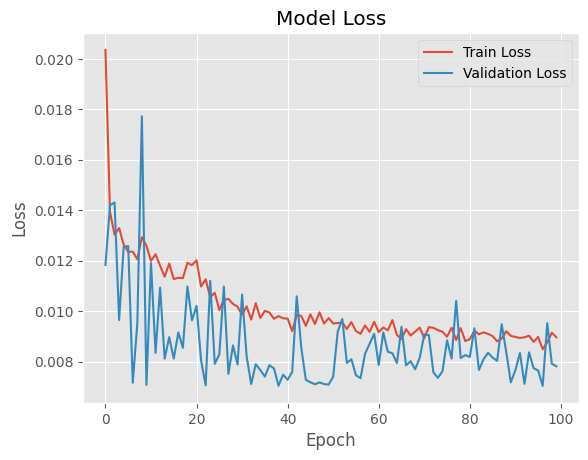

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

4/4 [==============================] - 0s 71ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])
val_predict = scaler.inverse_transform(val_predict)
y_val_inv = scaler.inverse_transform([y_val])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))
val_rmse = np.sqrt(mean_squared_error(y_val_inv[0], val_predict[:,0]))

In [ ]:
train_mae = mean_absolute_error(y_train_inv[0], train_predict[:,0])
test_mae = mean_absolute_error(y_test_inv[0], test_predict[:,0])
val_mae = mean_absolute_error(y_val_inv[0], val_predict[:,0])

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

train_mape = mean_absolute_percentage_error(y_train_inv[0], train_predict[:,0])
test_mape = mean_absolute_percentage_error(y_test_inv[0], test_predict[:,0])
val_mape = mean_absolute_percentage_error(y_val_inv[0], val_predict[:,0])

In [ ]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Validation RMSE: {val_rmse}\n")

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Validation MAE: {val_mae}\n")

print(f"Train MAPE: {train_mape}")
print(f"Test MAPE: {test_mape}")
print(f"Validation MAPE: {val_mape}")

Train RMSE: 0.28670300169747875
Test RMSE: 0.25187649561923486
Validation RMSE: 0.2801511487191826

Train MAE: 0.22095007213618695
Test MAE: 0.19426718292290449
Validation MAE: 0.216839990600778

Train MAPE: 26.47521560623333
Test MAPE: 28.475863967493677
Validation MAPE: 16.17957019734564


In [ ]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(test_predict[0])
print(val_predict[0])
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(818, 1)
(186, 1)
(128, 1)
[1.435294]
[1.1616765]
[1.0723729]
(818,)
(186,)
(128,)


In [ ]:
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

26/26 [==============================] - 2s 73ms/step


,Train Predictions,Actuals
0,[1.4352940320968628],[1.6207625]
1,[1.4174838066101074],[1.1044486111111111]
2,[1.3869203329086304],[0.9738847222222223]
3,[1.3368968963623047],[2.4371597222222223]
4,[1.3808729648590088],[1.9346888888888887]
...,...,...
813,[0.7619027495384216],[0.8095138888888888]
814,[0.7820407152175903],[0.7547680555555556]
815,[0.7963632345199585],[0.7688194444444444]
816,[0.8072277307510376],[0.5938486111111112]


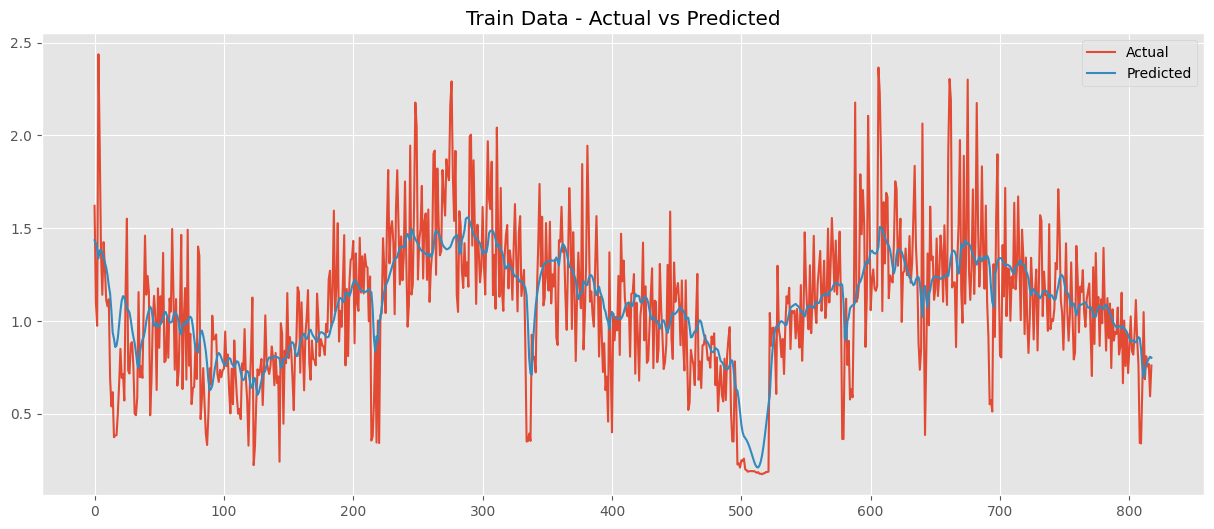

In [ ]:
# Plotting train predictions
plt.figure(figsize=(15,6))
plt.plot(y_train_inv[0], label='Actual')
plt.plot(train_predict[:,0], label='Predicted')
plt.title('Train Data - Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

actual_test = y_test.reshape(-1, 1)
actual_test = scaler.inverse_transform(actual_test)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

6/6 [==============================] - 0s 74ms/step


,test Predictions,Actuals_test
0,[1.1616765260696411],[0.9908000000000001]
1,[1.1409218311309814],[0.8013180555555555]
2,[1.0996863842010498],[0.898886111111111]
3,[1.068466305732727],[1.4553972222222222]
4,[1.1242868900299072],[1.033025]
...,...,...
181,[1.2262400388717651],[1.0484361111111111]
182,[1.2156190872192383],[1.0986333333333334]
183,[1.2009148597717285],[1.1473277777777777]
184,[1.2005460262298584],[1.0905555555555557]


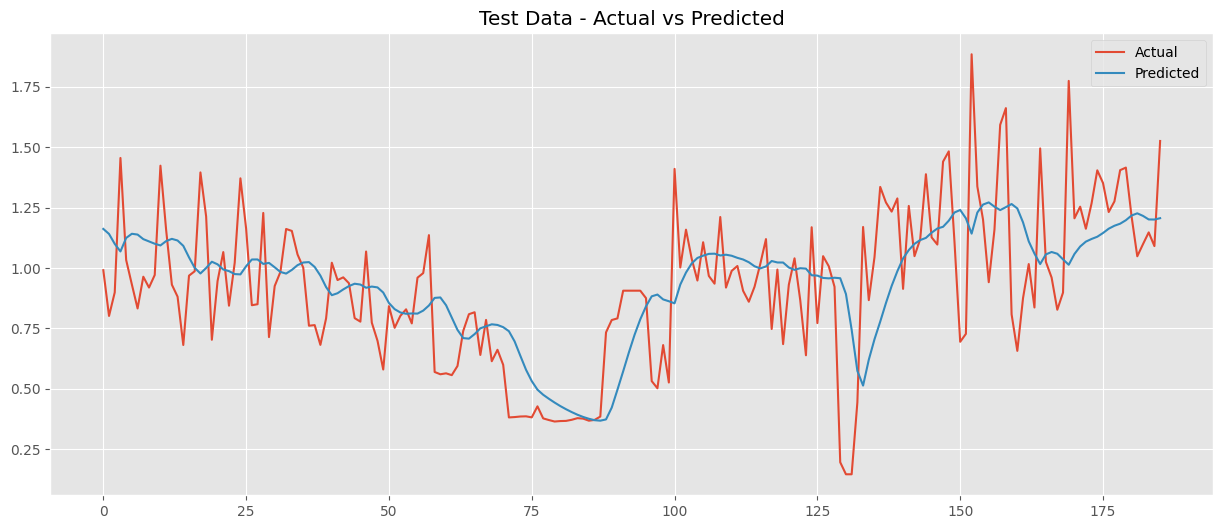

In [ ]:
# Plotting test predictions
plt.figure(figsize=(15,6))
plt.plot(y_test_inv[0], label='Actual')
plt.plot(test_predict[:,0], label='Predicted')
plt.title('Test Data - Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

actual_val = y_val.reshape(-1, 1)
actual_val = scaler.inverse_transform(actual_val)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

4/4 [==============================] - 0s 113ms/step


,Val Predictions,Actuals_val
0,[1.0723729133605957],[0.8004638888888889]
1,[1.0599614381790161],[1.1921805555555556]
2,[1.0658459663391113],[1.1257680555555556]
3,[1.0747276544570923],[0.8857791666666667]
4,[1.0688822269439697],[0.9919777777777778]
...,...,...
123,[1.4187984466552734],[1.4982166666666665]
124,[1.3980185985565186],[2.0159819444444445]
125,[1.408095359802246],[1.6085208333333334]
126,[1.4013261795043945],[1.4575638888888887]


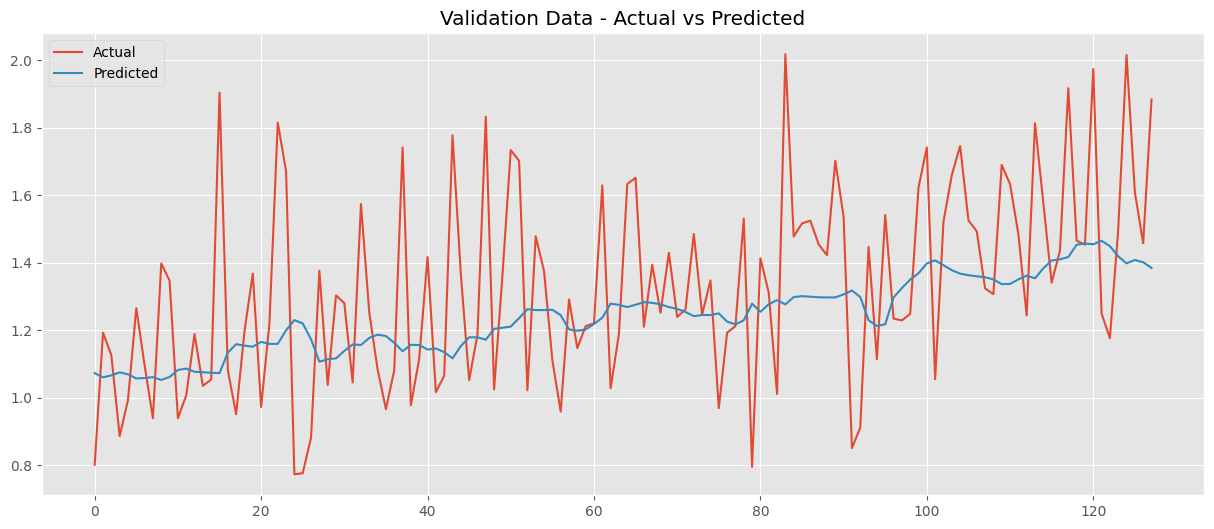

In [ ]:
# Plotting validation predictions
plt.figure(figsize=(15,6))
plt.plot(y_val_inv[0], label='Actual')
plt.plot(val_predict[:,0], label='Predicted')
plt.title('Validation Data - Actual vs Predicted')
plt.legend()
plt.show()

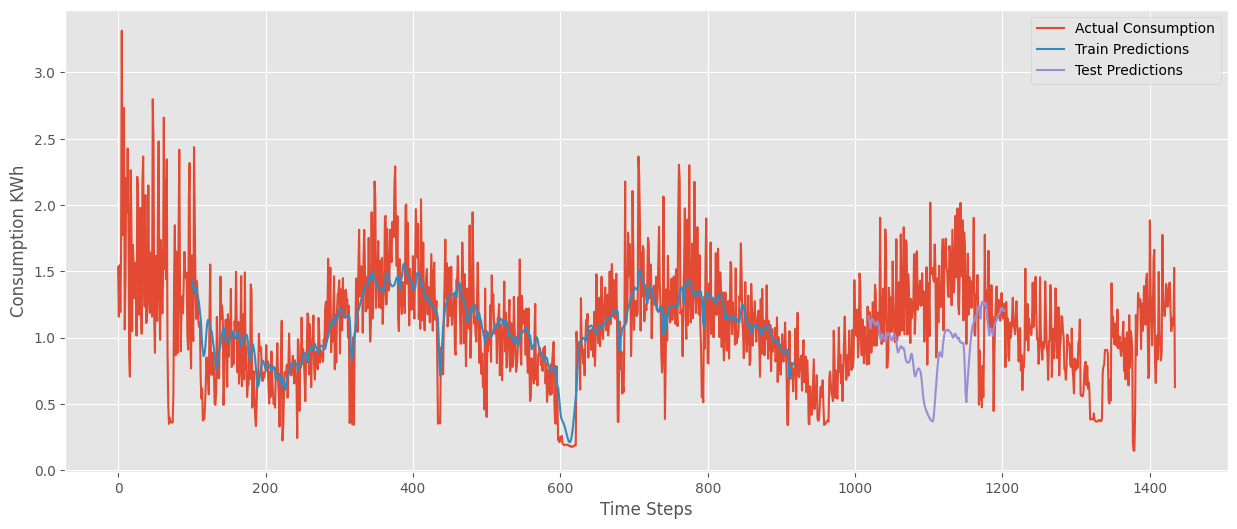

In [ ]:
y = np.array(y).reshape(-1,1)
look_back = 100
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
test_start_point = len(train_predict) + (look_back * 2)
testPredictPlot[test_start_point:test_start_point + len(test_predict), :] = test_predict

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(y), label='Actual Consumption')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Consumption KWh')
plt.show()

# **Future Forecasting**
---

In [ ]:
n_future = 30
n_steps = 100

In [ ]:
last_batch = y[-n_steps:].reshape(-1, 1)

In [ ]:
temp_input = last_batch.flatten().tolist()

In [ ]:
lst_output = []

In [ ]:
# Predict the future values
for i in range(n_future):
    x_input_reshaped = np.array(temp_input).reshape(1, n_steps, 1)
    yhat = model.predict(x_input_reshaped, verbose=0)
    lst_output.append(yhat[0][0])
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]

In [ ]:
lst_output_unscaled = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

In [ ]:
lst_output

[0.34057578,
 0.34510398,
 0.35107082,
 0.35440472,
 0.35468465,
 0.35277373,
 0.34963477,
 0.34590632,
 0.34188733,
 0.33765948,
 0.33323044,
 0.3286566,
 0.32413077,
 0.3200068,
 0.31673676,
 0.3147376,
 0.31423932,
 0.3151963,
 0.31728452,
 0.3199758,
 0.32266822,
 0.3248125,
 0.3260208,
 0.32611126,
 0.32508028,
 0.3230422,
 0.32016462,
 0.3166269,
 0.3126033,
 0.30826646]

In [ ]:
lst_output_unscaled

array([1.225234 , 1.2395831, 1.2584913, 1.2690558, 1.2699429, 1.2638875,
       1.2539406, 1.2421256, 1.2293901, 1.2159927, 1.2019577, 1.1874639,
       1.1731222, 1.160054 , 1.1496917, 1.1433566, 1.1417776, 1.1448102,
       1.1514275, 1.1599557, 1.1684877, 1.1752825, 1.1791115, 1.1793981,
       1.176131 , 1.1696727, 1.160554 , 1.1493436, 1.1365933, 1.1228505],
      dtype=float32)

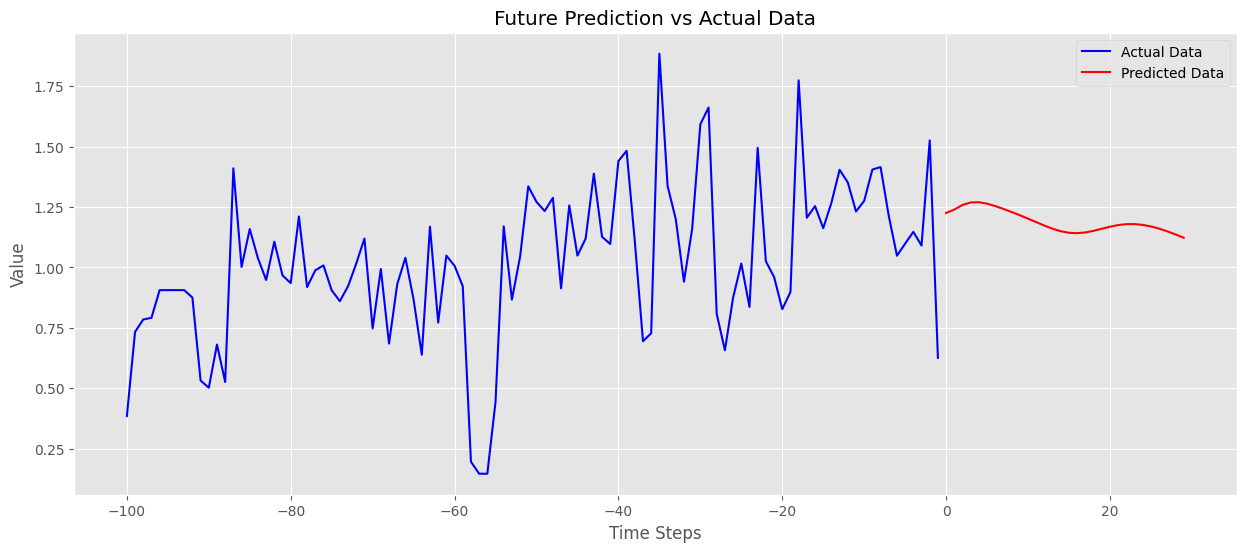

In [ ]:
n_past = 100
final_output = lst_output_unscaled
actual = scaler.inverse_transform(y[-n_past:]).flatten()

time_steps = list(range(-(n_past), 0))
future_steps = list(range(0, n_future))

plt.figure(figsize=(15, 6))
plt.plot(time_steps, actual, label='Actual Data', color='blue')
plt.plot(future_steps, final_output, label='Predicted Data', color='red')

plt.title('Future Prediction vs Actual Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()